In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # for better visuals


In [7]:
titanic = pd.read_csv('train.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(titanic.shape)
print(titanic.info())
print(titanic.isnull().sum())


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
d

In [9]:
titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 Observation:
- The average passenger age is around 29.7 years.
- Fare values are highly skewed with some very high ticket prices.
- 50% of passengers paid fare amounts less than 14.45.


In [10]:
titanic['Sex'].value_counts()
titanic['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77


Observation:
- There are more males (577) than females (314) aboard.
- Most passengers embarked from Southampton ('S'), followed by Cherbourg ('C') and Queenstown ('Q').


In [12]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


<ipython-input-12-595430d40845>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


Observation:
- Missing 'Age' values were filled with the median age (28.0).
- Missing 'Embarked' values were filled with the mode, which is 'S' (Southampton).
- 'Cabin' still has many missing values and may need further treatment if required.


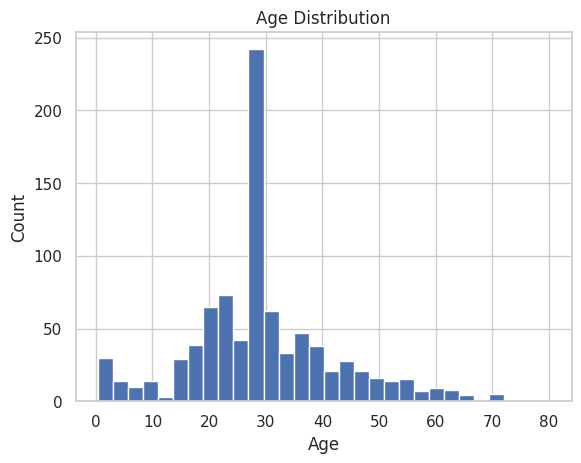

In [13]:
titanic['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Observation:
- Most passengers were between 20 to 40 years old.
- Very few very young or very old passengers were on board.


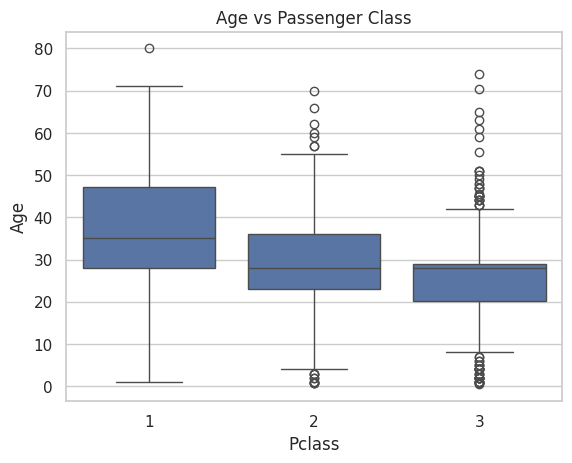

In [14]:
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Age vs Passenger Class')
plt.show()


 Observation:
- 1st class passengers are generally older than 2nd and 3rd class passengers.
- 3rd class had a wider range of younger passengers.


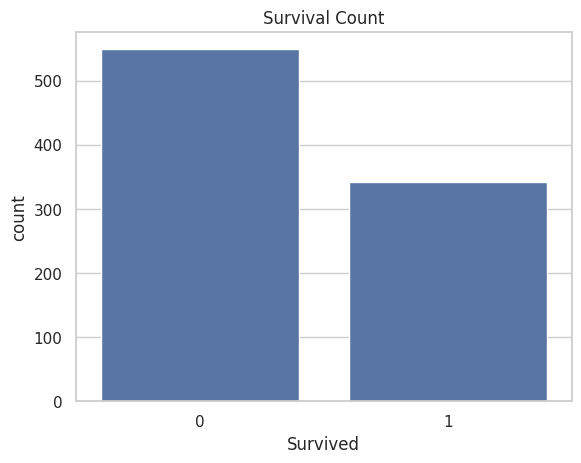

In [15]:
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()


 Observation:
- More passengers died (Survived = 0) than survived (Survived = 1).
- Survival rate was less than 50%.


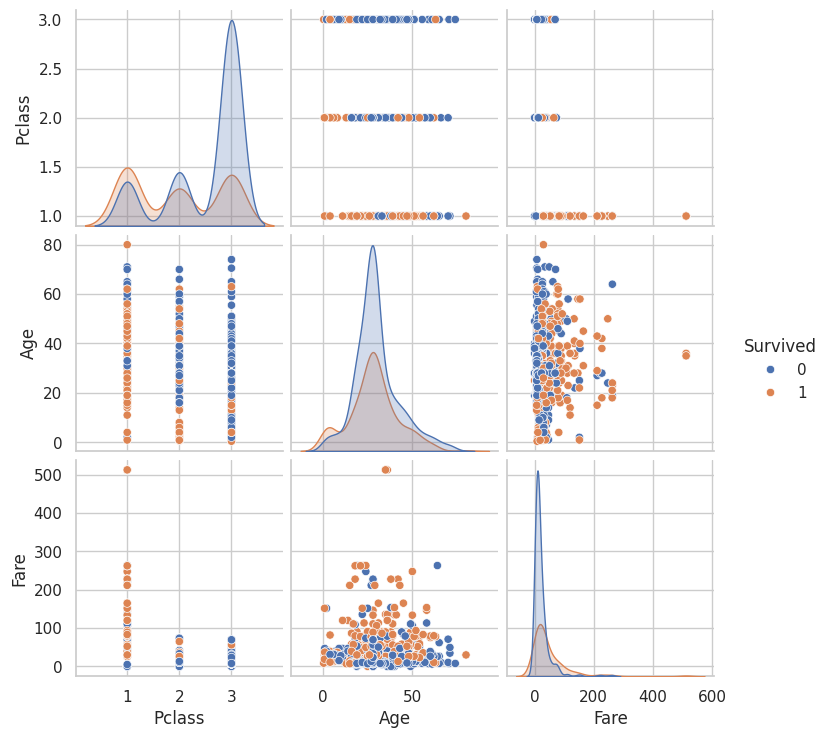

In [16]:
sns.pairplot(titanic[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()


 Observation:
- Higher fares and 1st class are strongly associated with higher survival rates.
- Passengers who survived were generally younger and had paid higher fares.


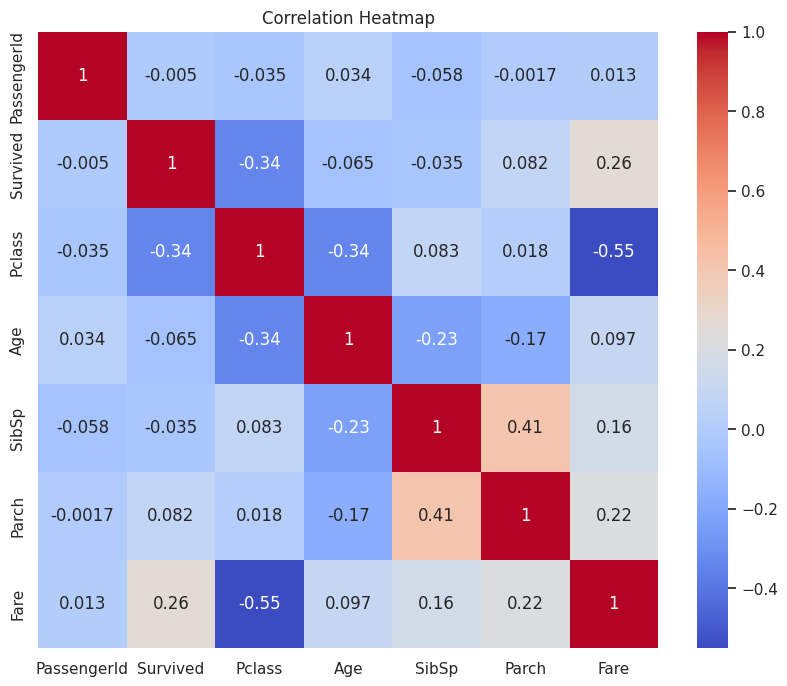

In [18]:
plt.figure(figsize=(10,8))
# Select only numerical features for correlation analysis
numerical_features = titanic.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observation:
- "Fare" and "Pclass" are negatively correlated (higher class = lower Pclass number = higher fare).
- "Survived" shows a good positive correlation with "Fare" and slight negative correlation with "Pclass".


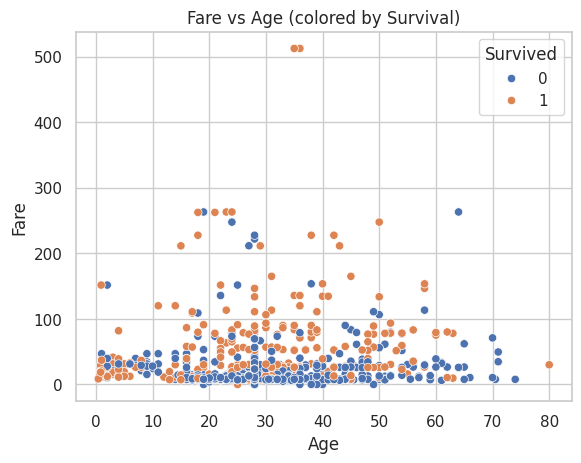

In [19]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Fare vs Age (colored by Survival)')
plt.show()


Observation:
- Survivors tend to have paid higher fares, regardless of age.
- There are many low-fare, low-age passengers who did not survive.


Summary of findings :

- Upon conducting Exploratory Data Analysis (EDA) on the Titanic data, a few key trends were noted:

- Survival Rate: The overall survival rate was below 40%, which means that a majority of passengers did not survive the tragedy.

- Gender and Survival: Women had a significantly higher survival rate than men, which implies that "women and children first" might have been practiced.

- Passenger Class: 1st class travelers survived in much greater numbers, while 3rd class survivors were lowest. Wealth and status probably determined survival.**bold text**

- Age Factor: Passengers under the age of 10 years, as well as passengers generally under 10 years old, survived in better proportions.

- Fare and Survival: Travelers who paid higher fares (most likely those traveling in more expensive classes) survived in larger proportions.

- Embarkation Port: Passengers embarked from Southampton in the largest numbers, but there was some variation in survival among different points of embarkation.

- These findings illustrate the interaction between socio-economic variables (class, fare, gender) and survival in the Titanic disaster. Additional predictive modeling may employ these results to enhance survival prediction.